# Neural Network vs. Perceptron

### Developer: Mayana Mohsin Khan


# Loading Packages

In [4]:
# install.packages('gridExtra')
library('gridExtra')
library(reshape2)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"

#### Utility functions

In [1]:
# Structure to return multiple list from a unction
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

### Reading Data

In [2]:
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1     

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Plotting Training and testing Data

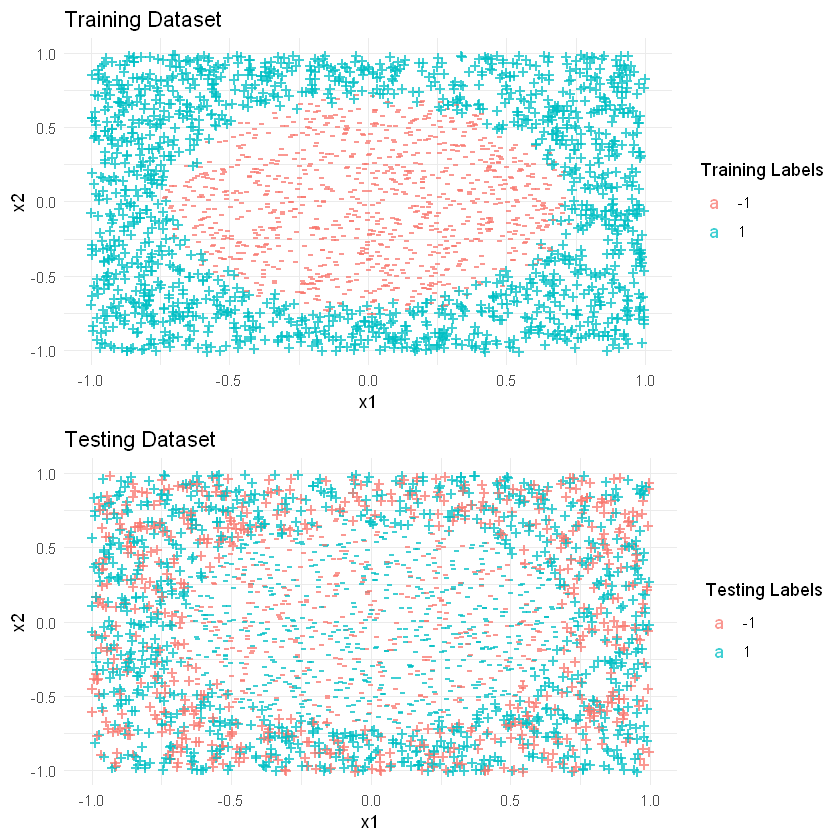

In [5]:
X.train <- cbind(X1, as.matrix(T1)) # conbine the X1 dataframe and T1 labes into one 
X.test <- cbind(X2, as.matrix(T2)) # conbine the X2 dataframe and T2 labes into one 

# plot training dataset
training.plot <- ggplot(data=X.train, aes(x=x1, y=x2, label=ifelse(T1 == 1, '+', '-'), color=factor(T1))) +
    geom_text(alpha=0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Training Labels'))+
    ggtitle('Training Dataset') +
    theme_minimal()

#plot testing dataset
testing.plot <- ggplot(data=X.test, aes(x=x1, y=x2, label=ifelse(T2 == 1, '+', '-'), color=factor(T1))) +
    geom_text(alpha=0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Testing Labels'))+
    ggtitle('Testing Dataset') +
    theme_minimal()

grid.arrange(training.plot, testing.plot)

# PERCEPTRON

In [6]:
## error rate
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

### Building Perceptron

In [7]:
####################### PERCEPTRON #######################
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}

## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}

## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}

In [12]:
# Build a perceptron using training data and eta as 0.09 and 0.01
W9 <- perceptron.build(X1, T1, eta=0.09, tau.max = 1000, plotting = FALSE) # Model with eta = 0.09
W1 <- perceptron.build(X1, T1, eta=0.01, tau.max = 1000, plotting = FALSE) # Model with eta = 0.01

In [13]:
# Adding bias to testing data
X2.b = as.matrix(cbind(bias=1, X2))
head(X2.b) # printing the testing data with bias

bias,x1,x2
1,0.4973951,-0.5492695
1,0.2139925,0.6141635
1,-0.4656182,0.5093878
1,-0.1380630,0.8841224
1,0.6593270,0.3378901
1,0.6670054,0.6012369


In [14]:
# Predict 
Phi9 = perceptron.predict(X2.b, W9) # eta = 0.09
Phi1 = perceptron.predict(X2.b, W1) # eta = 0.01
# Calcualte the errors
err9 = error.rate(Phi9, T2) # eta = 0.09
err1 = error.rate(Phi1, T2) # eta = 0.01

In [15]:
paste0('Error if eta = 0.09: ',err9)
paste0('Error if eta = 0.01: ',err1)

[1] "Error if eta = 0.09: 0.492"

[1] "Error if eta = 0.01: 0.5384"

***Choose eta with least error rate value, we build the perceptron model.<br>
In this case, eta 0.09 is choosen as it has the least value.***
***The Decision boundaries for the perceptron on testing dataset is plotted by calculating the phi value by predicating the perceptron model and calculating the error.***

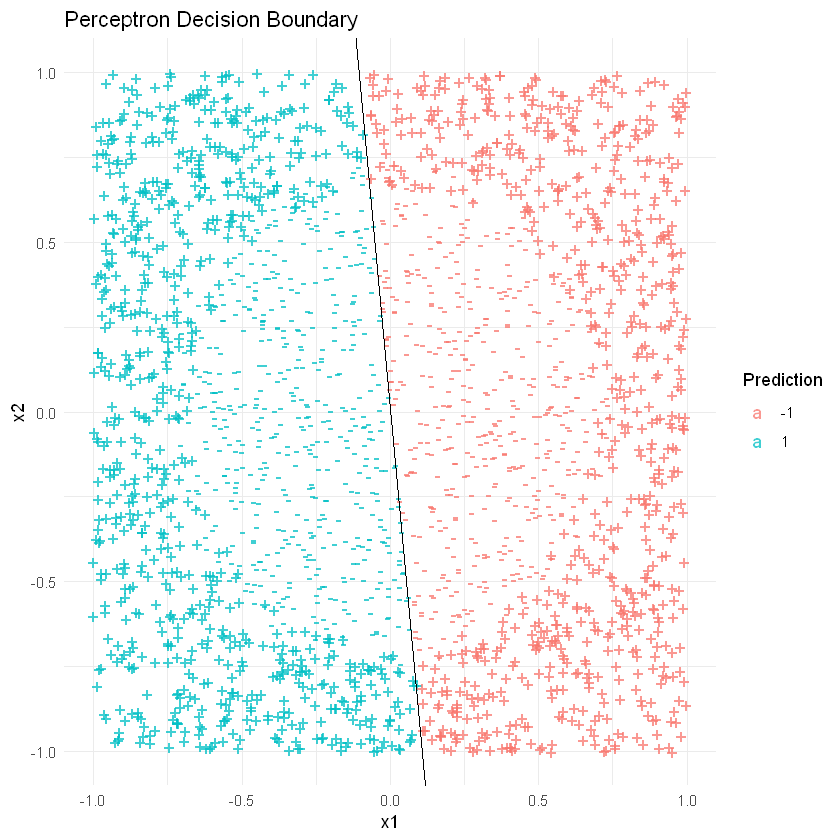

In [16]:
# Plotting the preceprton on testing data
ggplot(data=as.data.frame(X2), 
       aes(x=x1, y=x2, 
           label=ifelse(T2 == 1, '+', '-'), 
           color=factor(Phi9))) +
        geom_text(alpha=0.75) +
        scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
        geom_abline(intercept=W9[1], slope=-W9[2]/W9[3]) +
        ggtitle('Perceptron Decision Boundary') +
        theme_minimal()

# NEURAL NETWORK

In [28]:
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}

## the derivitive of the activation function (tanh here)
# h.d <- function(z, a=1) {
#   return (1-(h(z, a))^2)
# }

h.d <- function(z) {
return (1-(h(z))^2)
}

## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  N <- ncol(X1)  
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
#     if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
#   plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}

In [31]:
# Build a number of Neural Networks with different number of units in the hidden layer (TO BE COMPLETE)
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))
K <- seq(5, 100, 5)
eta = c(0.09,0.01)

nn.accuracy <- data.frame('K'= seq(5, 100, 5), 'eta.0.09' = rep(0,20),'eta.0.01' = rep(0,20))
best.w <- list()

i <- 1
for (k in 1:length(K)) {
    for (e in 1:length(eta)){
        list[W1, W2, b1, b2]<- nn.build(K[k], X1.t, T1, plotting=FALSE, epoch.max=1000, eta = eta[e], lambda = 0.01)
        Y = nn.predict(X2.t, W1, W2, b1, b2)
        err <- error.rate(Y, T2)
        nn.accuracy[k,(e+1)] <- err
        best.w[[i]] <- list(W1, W2, b1, b2, err, k)
        i <- i +1
    }
}

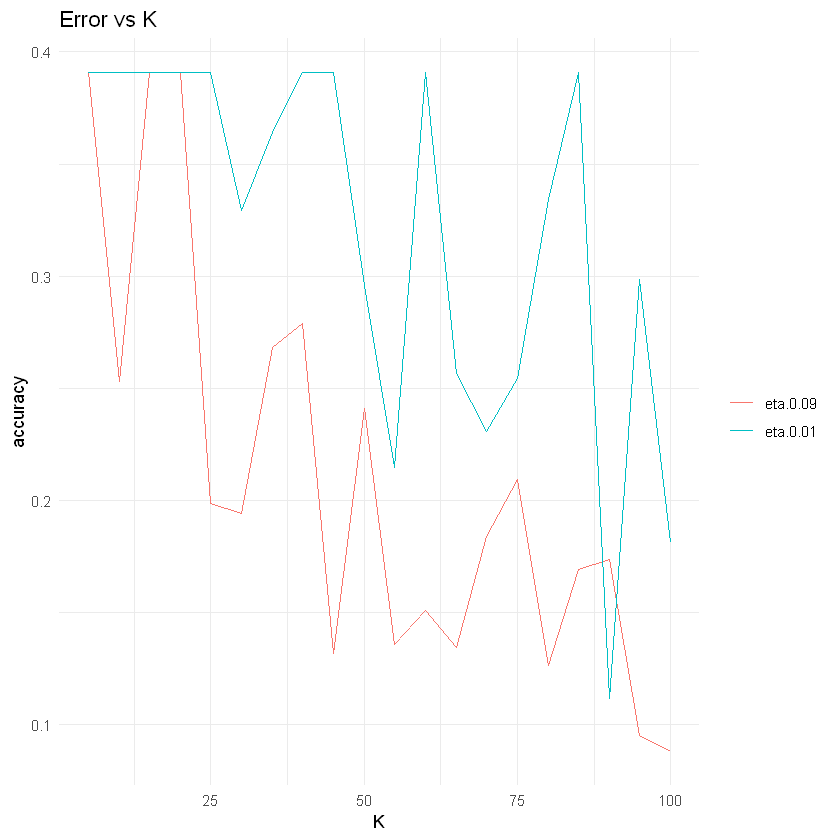

In [36]:
# pivot the nn.accuracy dataframe
nn.accuarcy.m <- melt(nn.accuracy, id='K') 

# rename the columns
names(nn.accuarcy.m) <- c('K', 'type', 'accuracy')

# # Plot the graph for MSE vs 1/k
ggplot(data=nn.accuarcy.m, aes(x= K, y= accuracy, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Error vs K")

The optimal value for **K** is **100** with **eta** as **0.09**.

In [171]:
# Get the values of the best model
W1 <- as.data.frame(best.w[[39]][1])
W2 <- best.w[[39]][2]
b1 <- best.w[[39]][3]
b2 <- best.w[[39]][4]

# reformat the values
W1 <- matrix(unlist(W1), ncol=length(W1))
W2 <- matrix(unlist(W2), nrow=length(W2))
b1 <- matrix(unlist(b1), nrow=length(b1))
b2 <- as.matrix(unlist(b2))

In [172]:
# Predict
Y = nn.predict(X2.t, W1, W2, b1, b2)

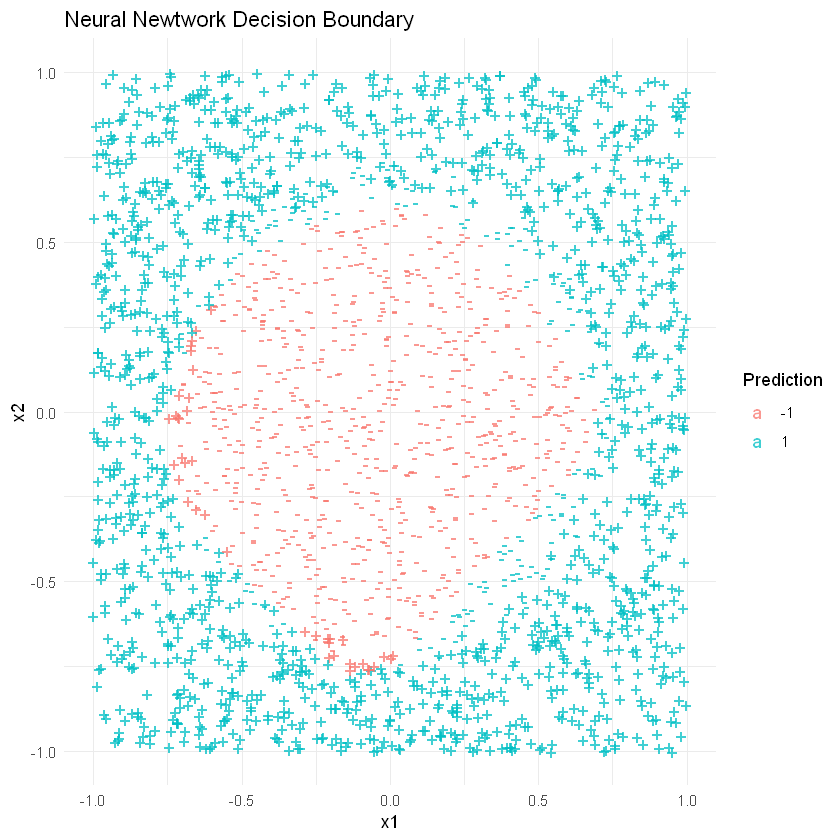

In [173]:
# Plot the Neural Newtwork descission boundaries
ggplot(data=as.data.frame(X2), 
       aes(x=x1, y=x2, label=ifelse(T2 == 1, '+', '-'), 
           color=factor(Y))) +
    geom_text(alpha=0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Neural Newtwork Decision Boundary') +
    theme_minimal()

In the decision boundary graph for Neural Network, we can see that all the test samples more on less based on the predicted and truth values converge.